** The Plot script for all optimizers and comparisons **

In [32]:
import os, pickle
%matplotlib notebook
import matplotlib.pyplot as plt
import torch
import numpy as np

In [33]:
def get_curve_data(optimizer, dataset, model):
    folder_path = "./curves"
    model_name = "{}-{}-{}".format(optimizer, dataset, model)
    file_path = os.path.join(folder_path, model_name)
    #return {key: torch.load(fp) for key, fp in zip(keys, paths)}
    with open(file_path, "rb") as f:
        return pickle.load(f)

In [38]:
def plot(model, dataset, optimizers=None, curve_type='test', curve_metric="acc"):
    assert model in ['lstm', 'resnet', 'bert'], 'Invalid model name: {}'.format(model)
    assert curve_type in ['train', 'test'], 'Invalid curve type: {}'.format(curve_type)
    
    plt.figure()
    plt.title('{} {} for {}-{}'.format(curve_type.capitalize(), curve_metric.capitalize(), model, dataset))
    plt.xlabel('Iterations')
    plt.ylabel('{} {} %'.format(curve_type.capitalize(), curve_metric.capitalize()))
    if "loss" in curve_metric:
        plt.ylim(0, 1.0)
    elif "acc" in curve_metric:
        plt.ylim(60, 100)
    elif 'f1' in curve_metric:
        plt.ylim(0.6,1.0)
    for optim in optimizers:
        linestyle = '--' if 'clip' in optim else '-'
        curve_data = get_curve_data(optim, dataset=dataset, model=model)
        print ('{}_{}'.format(curve_type, curve_metric), curve_data['{}_{}'.format(curve_type, curve_metric)])
        accuracies = np.array(curve_data['{}_{}'.format(curve_type, curve_metric)])
        plt.plot(accuracies, label=optim, ls=linestyle)
        
    plt.grid(ls='--')
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>


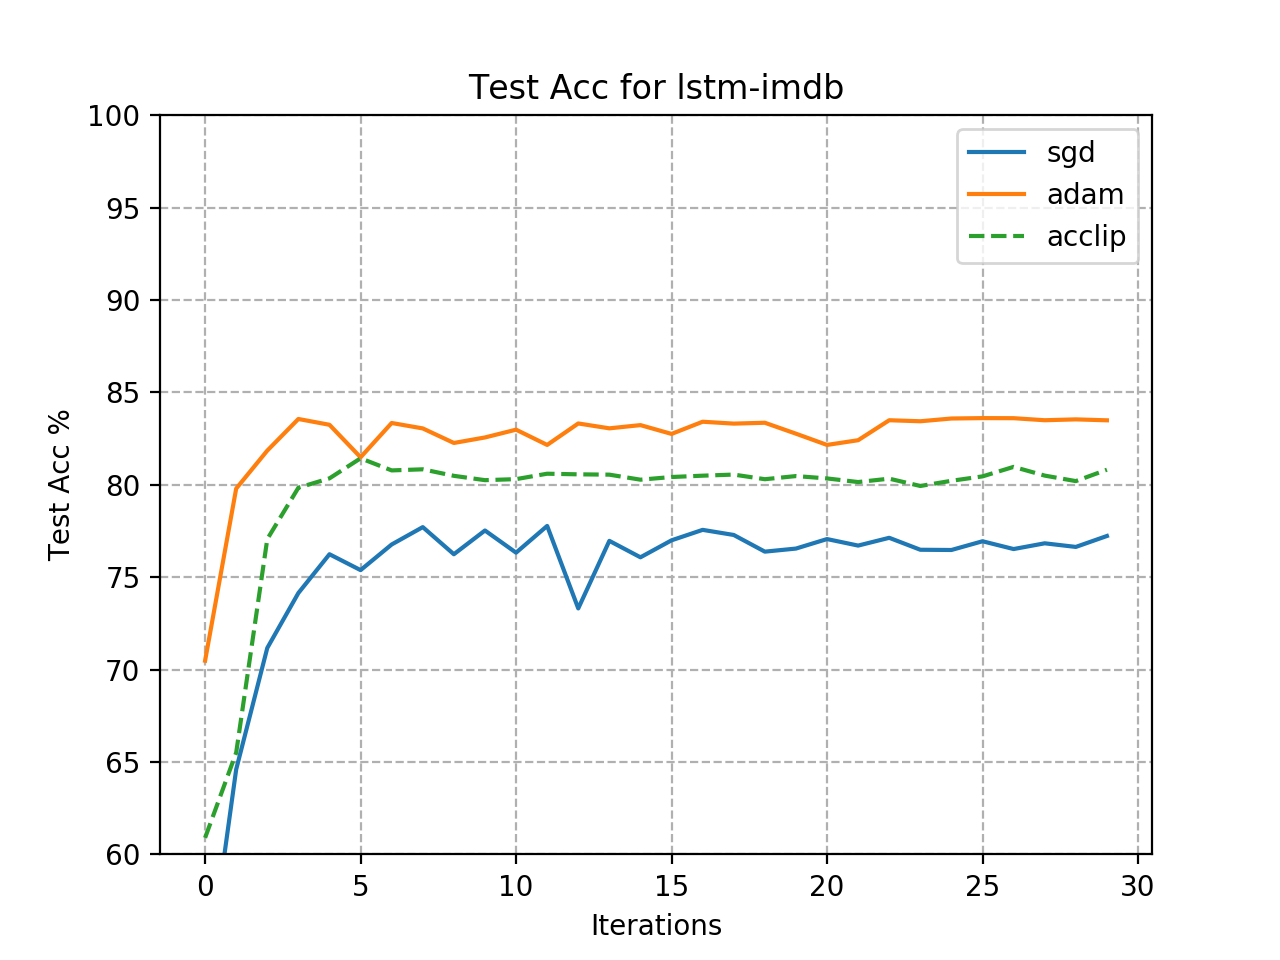

test_acc [52.42978723404255, 64.6, 71.17021276595744, 74.14468085106382, 76.24255319148936, 75.38297872340425, 76.77021276595745, 77.71063829787234, 76.24255319148936, 77.52765957446809, 76.32765957446809, 77.77446808510638, 73.31063829787234, 76.96595744680852, 76.07659574468084, 76.99574468085106, 77.56170212765957, 77.28510638297873, 76.38297872340425, 76.54893617021277, 77.06382978723404, 76.71063829787234, 77.13191489361702, 76.48510638297873, 76.47234042553191, 76.94468085106384, 76.52340425531915, 76.8340425531915, 76.63829787234043, 77.22978723404255]
test_acc [70.48085106382979, 79.79574468085106, 81.85106382978724, 83.56170212765957, 83.2468085106383, 81.48936170212765, 83.34468085106383, 83.05106382978724, 82.26382978723404, 82.56170212765957, 82.98297872340426, 82.15744680851064, 83.31914893617021, 83.05531914893616, 83.22978723404255, 82.7531914893617, 83.41276595744681, 83.31063829787234, 83.35744680851064, 82.76595744680851, 82.15744680851064, 82.41276595744681, 83.49361

<IPython.core.display.Javascript object>


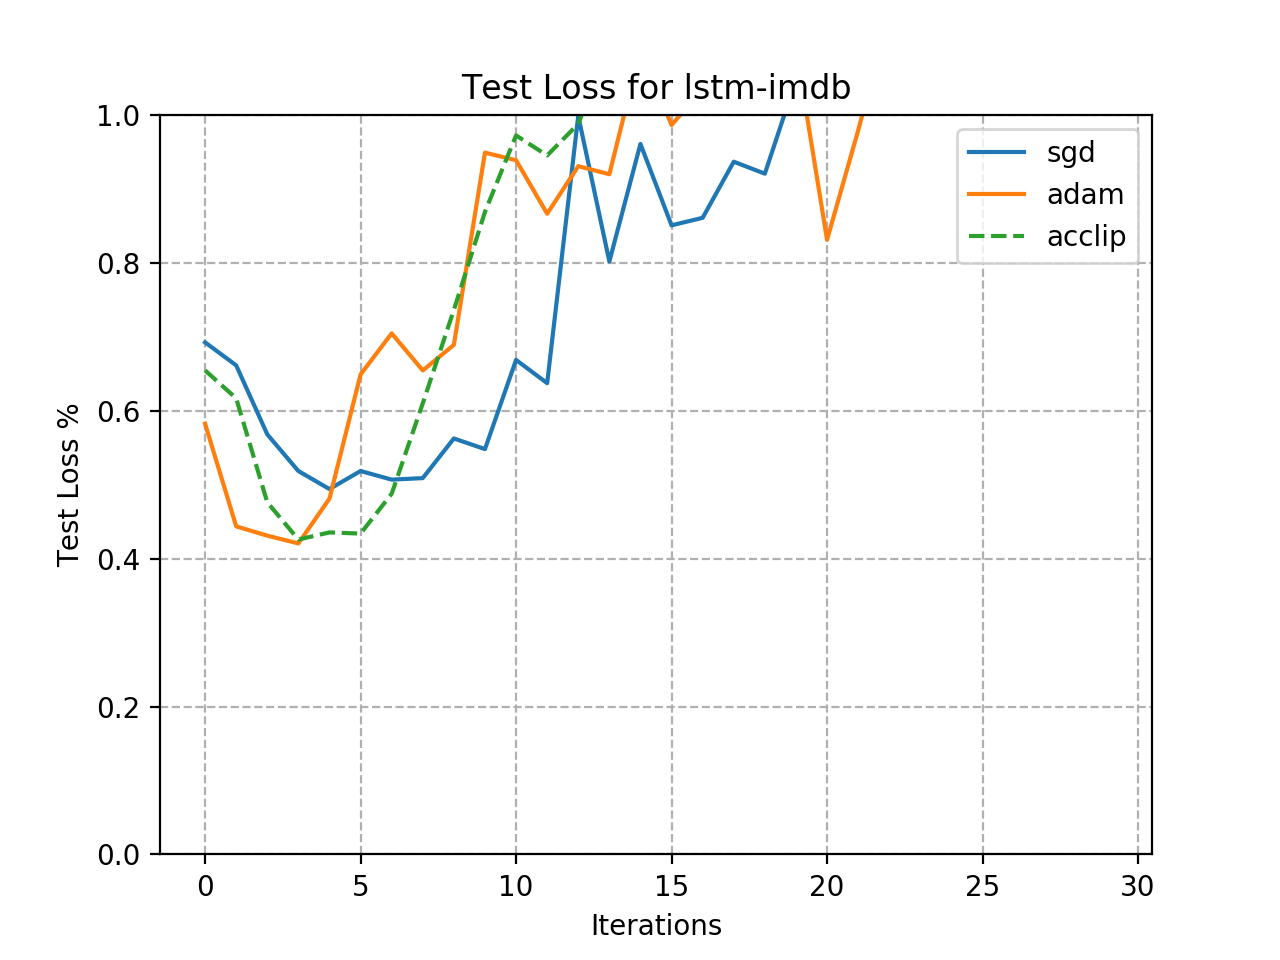

test_loss [0.692701158878651, 0.661553353451668, 0.5682186498286876, 0.5185905071015053, 0.49425253151579107, 0.518658021789916, 0.5070029143957382, 0.5090374824214489, 0.5626853246004023, 0.5483057840707454, 0.6689326008266591, 0.6375101032726308, 0.999023071216776, 0.8021433942812555, 0.961163941025734, 0.851007267832756, 0.8611799225845236, 0.9370819750618428, 0.9208837197816119, 1.0477203849782335, 1.1661701692862714, 1.1811487939129484, 1.15243561131523, 1.1785465349542334, 1.219810173311766, 1.1783596742184872, 1.3168993775514846, 1.330815542631961, 1.3152808252325718, 1.3406348041238938]
test_loss [0.582634726103316, 0.4437885935636277, 0.43119926481170856, 0.42068330807254667, 0.4813319256648104, 0.6492783686344293, 0.704833330023796, 0.6546887115278143, 0.6893099889793295, 0.9493424669542211, 0.9391120587019844, 0.8667422958352464, 0.9310531688180376, 0.9201641227653686, 1.0890265883600458, 0.9867299650419266, 1.0357234461986005, 1.242988513449722, 1.3362567136737895, 1.091164

<IPython.core.display.Javascript object>


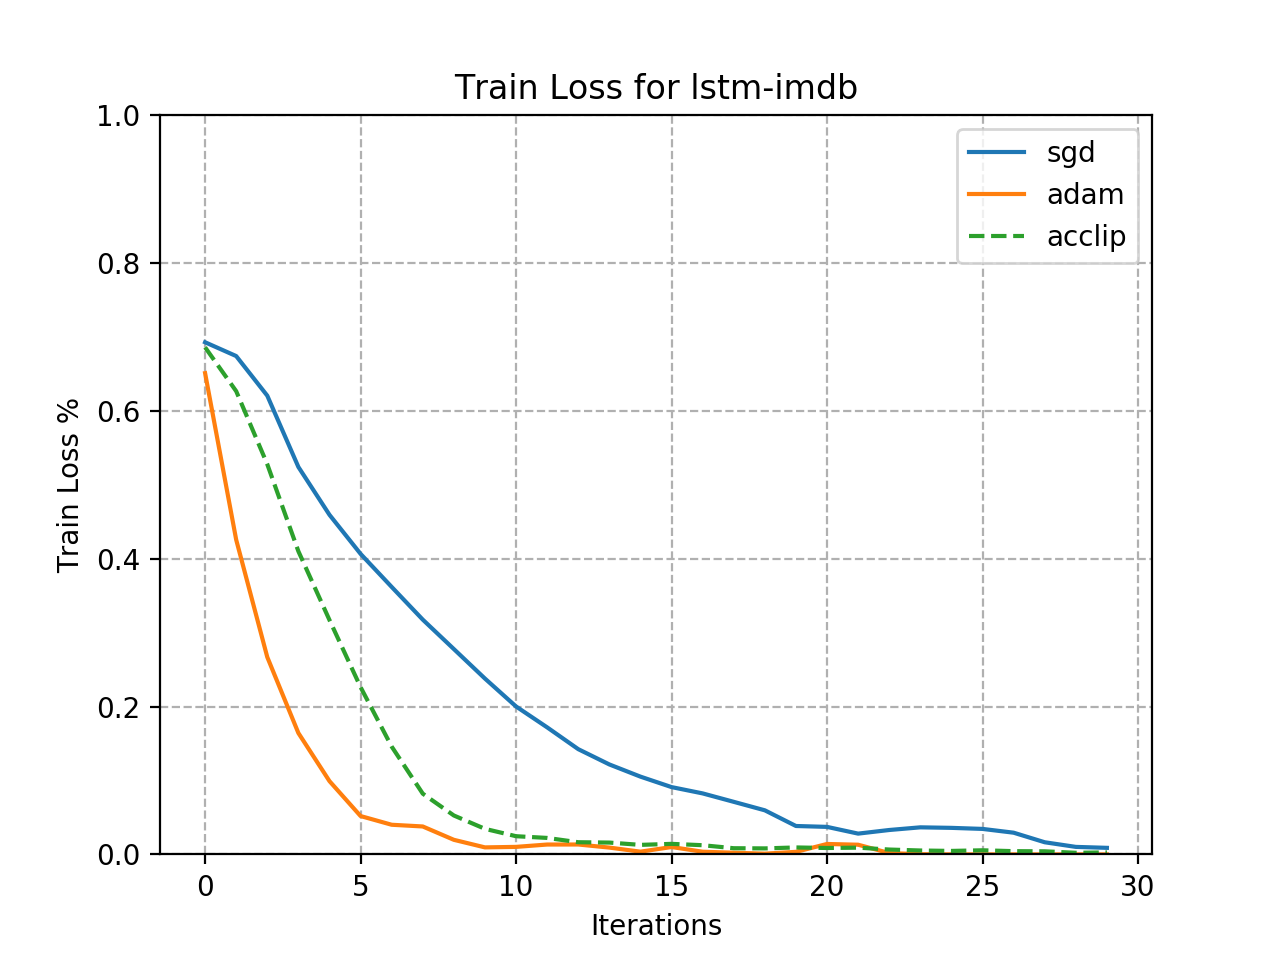

train_loss [0.6928308099453803, 0.6741634388292511, 0.6205464626034174, 0.5241333780166654, 0.4593756525782388, 0.4065452841343784, 0.3618254703103515, 0.3175851032137871, 0.27775428009643416, 0.23784615124628575, 0.20009899955290544, 0.17185242567041129, 0.1423661504383497, 0.1216920749224736, 0.10520351617520426, 0.09105146231242137, 0.08251583010938965, 0.07111462961262606, 0.05962905520658388, 0.038426575550581356, 0.03722408695624872, 0.028108013102570224, 0.033008939399293724, 0.036613697833100665, 0.035900742591101625, 0.0344744928690249, 0.029368380521350903, 0.016423817143402655, 0.010158790101789252, 0.008869666269072886]
train_loss [0.6510919034481049, 0.4256734144099234, 0.26687849255132284, 0.16420124921014692, 0.09910760809355833, 0.05188895917414148, 0.04010589386828557, 0.03778373110882761, 0.019720807968650757, 0.009483911566488645, 0.010168175424374232, 0.013348582407997639, 0.013387142162994777, 0.009211247678870809, 0.0036917066463768157, 0.009970277241860339, 0.003

In [37]:
optim_list = ['sgd', 'adam', 'acclip']
plot(model='lstm', dataset='imdb', optimizers=optim_list, curve_type='test', curve_metric='acc')
plot(model='lstm', dataset='imdb', optimizers=optim_list, curve_type='test', curve_metric='loss')
plot(model='lstm', dataset='imdb', optimizers=optim_list, curve_type='train', curve_metric='loss')

<IPython.core.display.Javascript object>


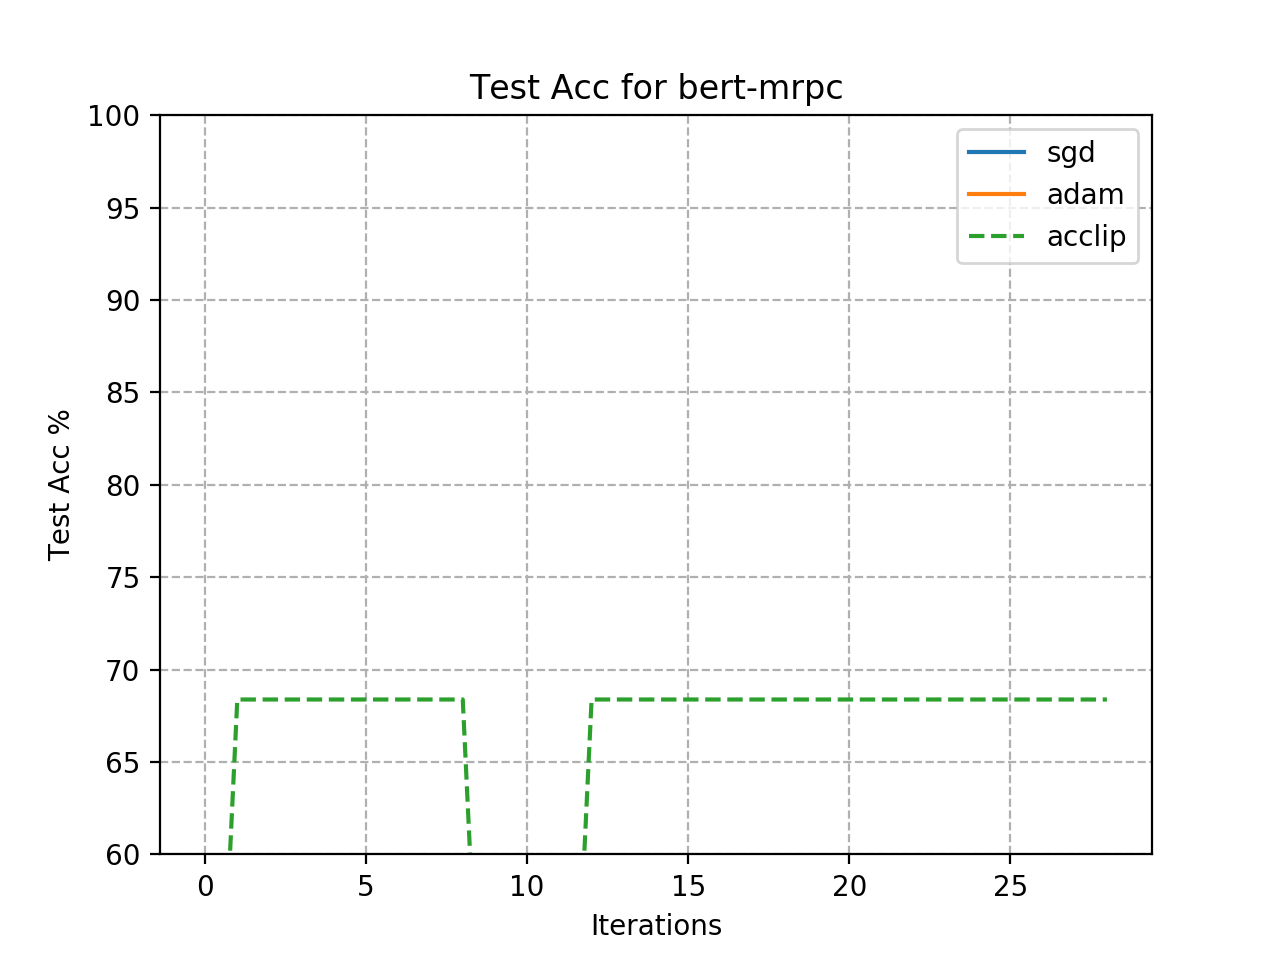

test_acc [0.8122270742358079, 0.7401869158878506, 0.8217967599410898, 0.8169838945827232, 0.8303030303030303, 0.8406779661016949, 0.8260869565217392, 0.8604651162790697, 0.8697123519458544, 0.8836424957841484, 0.8677248677248677, 0.8596491228070176, 0.8686131386861314, 0.8533834586466165, 0.8637992831541219, 0.8614800759013282, 0.8727272727272727, 0.8733766233766234, 0.8762541806020068, 0.8571428571428572, 0.8811188811188811, 0.870307167235495, 0.8657243816254417, 0.8791593695271455, 0.8797127468581688, 0.8747855917667238, 0.8752136752136752, 0.8817204301075269, 0.8736462093862816]
test_acc [0.8286604361370716, 0.8219584569732937, 0.8416149068322981, 0.8417618270799347, 0.8552845528455285, 0.853968253968254, 0.8677419354838709, 0.8752079866888519, 0.8719723183391003, 0.8580542264752791, 0.8730964467005077, 0.8745762711864407, 0.8781302170283807, 0.8828522920203735, 0.8809523809523808, 0.8819444444444444, 0.8862876254180602, 0.8825503355704698, 0.8729874776386405, 0.883248730964467, 0.8

<IPython.core.display.Javascript object>


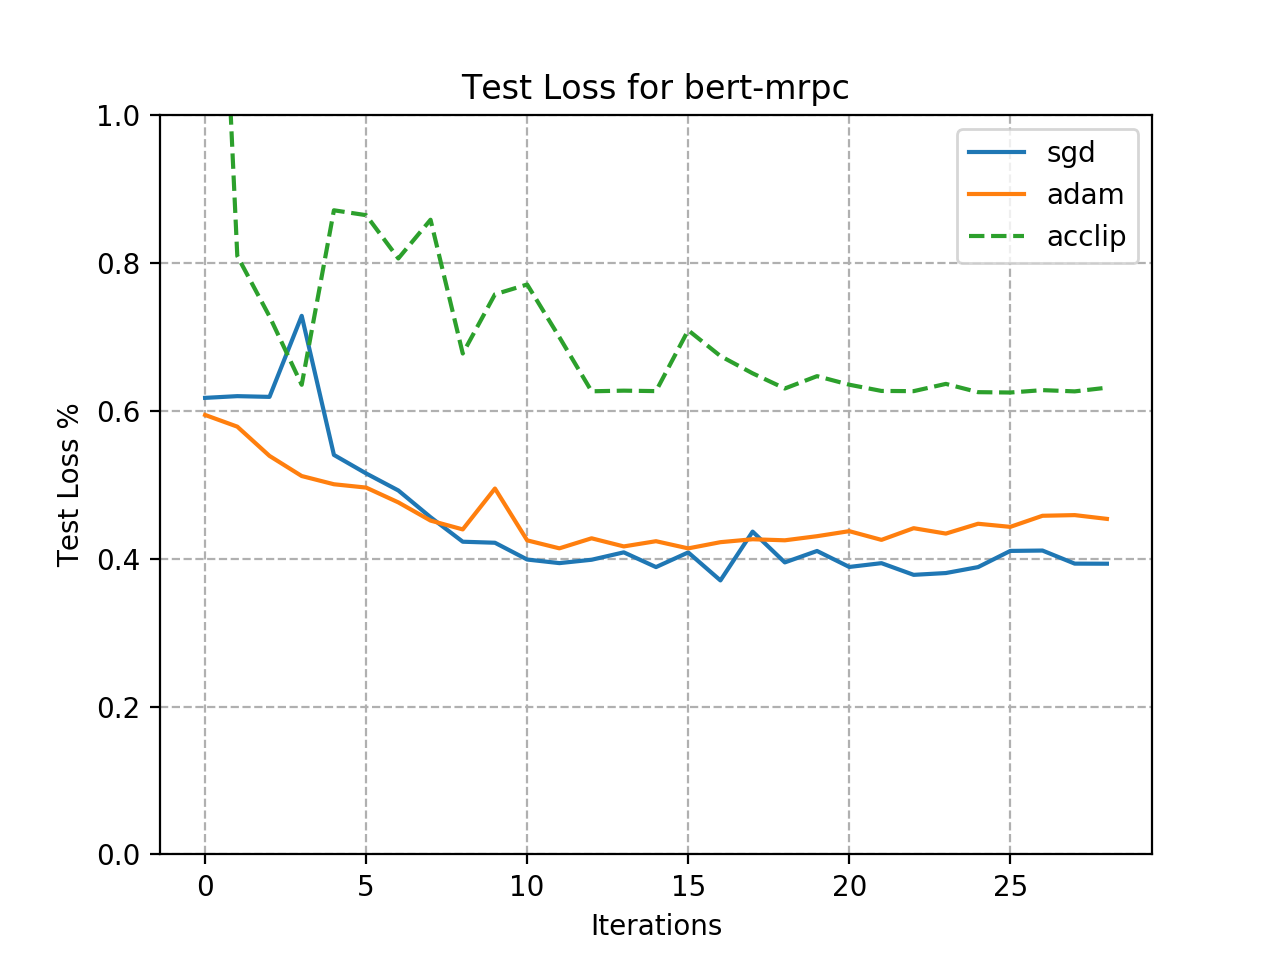

test_loss [0.6175932070383658, 0.6199301045674545, 0.6189377537140479, 0.7285874543281702, 0.5404225381521078, 0.5153749355903039, 0.4923267307189795, 0.4561591480786984, 0.4230021364413775, 0.4216071671018234, 0.3989029939358051, 0.3940471066878392, 0.39860258939174503, 0.408627056158506, 0.3886860265181615, 0.4085056357658826, 0.37064474247969115, 0.43666192488028455, 0.39501686164966, 0.4104722302693587, 0.3888608996684735, 0.39399398691379106, 0.37818352247659975, 0.3806255104450079, 0.3886580163469681, 0.4105507903374158, 0.4110537509505565, 0.3933540370601874, 0.39325066541249937]
test_loss [0.5944904043124273, 0.578667035469642, 0.5390888441067475, 0.5118568516694583, 0.5007344896976764, 0.4962227138189169, 0.4762000561906741, 0.4515748299085177, 0.439640346627969, 0.49494646948117477, 0.4248443234425325, 0.4140412165568425, 0.4276264298420686, 0.41663844654193294, 0.4237000116935143, 0.41397604231651014, 0.42237947021539396, 0.4263334440497252, 0.4249114084702272, 0.43046665936

<IPython.core.display.Javascript object>


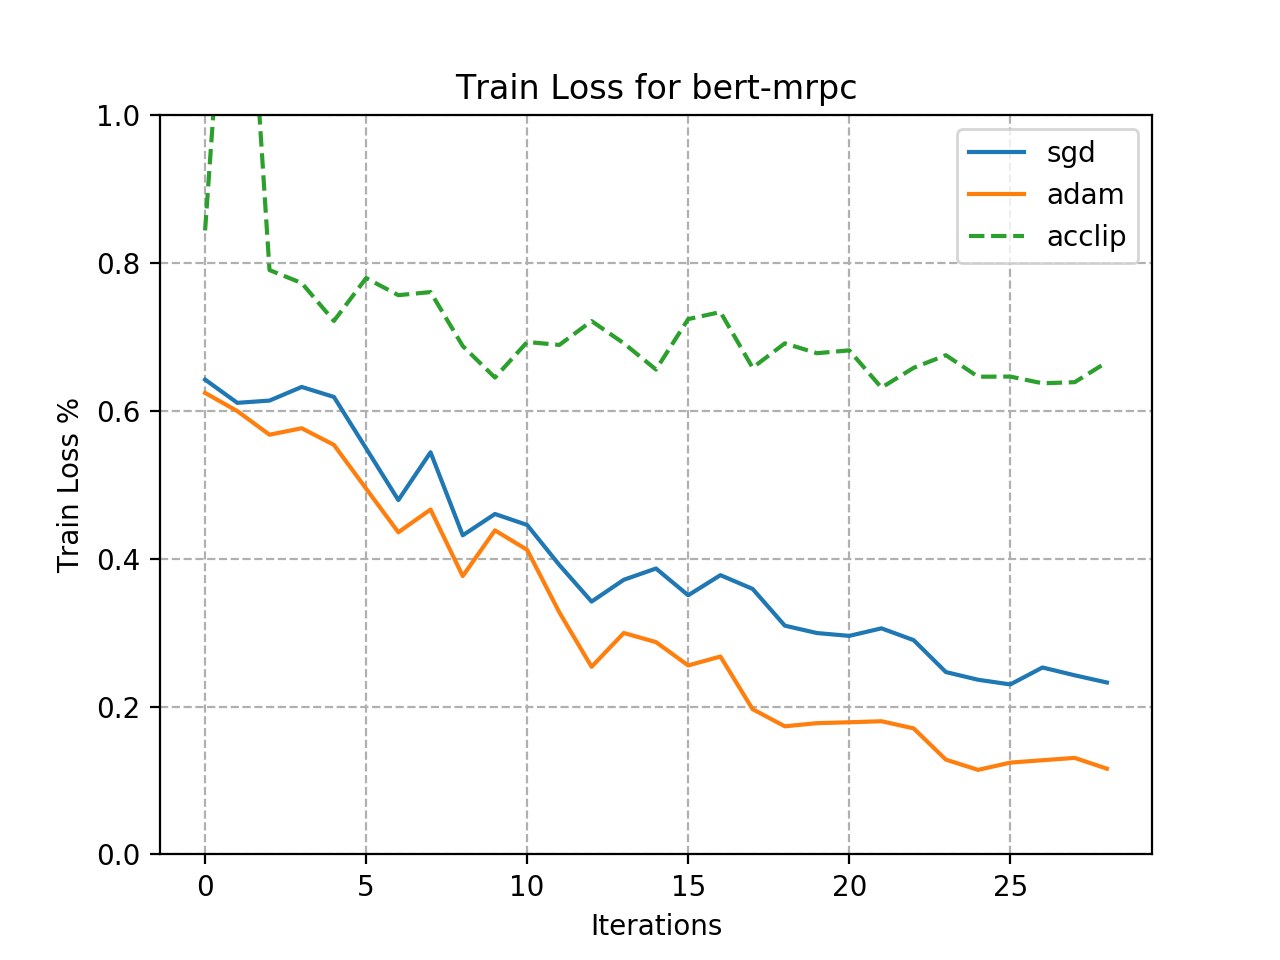

train_loss [0.6423264503479004, 0.6108683049678802, 0.6139269411563874, 0.6323787480592727, 0.6188486099243165, 0.5492343544960022, 0.47935943901538847, 0.5439742028713226, 0.43168128132820127, 0.460501554608345, 0.4456426054239273, 0.3914765268564224, 0.342025887966156, 0.3715165078639984, 0.38675920367240907, 0.3505487859249115, 0.37777396887540815, 0.3591510489583015, 0.3094341427087784, 0.2994321554899216, 0.2956145375967026, 0.3058321624994278, 0.2898423790931702, 0.24666570723056794, 0.23626365065574645, 0.22992828935384751, 0.25285029858350755, 0.24229685366153716, 0.23252906203269957]
train_loss [0.6243566751480103, 0.599706107378006, 0.5677424490451812, 0.5765182077884674, 0.5540120929479599, 0.4947636812925339, 0.4358027338981628, 0.46652617752552034, 0.3765124022960663, 0.4383738249540329, 0.41198823153972625, 0.32731983363628386, 0.25380691736936567, 0.2995233789086342, 0.28719319999217985, 0.2556160897016525, 0.2676637455821037, 0.19645249396562575, 0.17328234612941742, 0.

In [39]:
optim_list = ['sgd', 'adam', 'acclip']
plot(model='bert', dataset='mrpc', optimizers=optim_list, curve_type='test', curve_metric='acc')
plot(model='bert', dataset='mrpc', optimizers=optim_list, curve_type='test', curve_metric='loss')
plot(model='bert', dataset='mrpc', optimizers=optim_list, curve_type='train', curve_metric='loss')